In [23]:
import bond_embedding
import numpy as np
from scipy.io import mmread
import scipy.sparse as sp
import torch
import edges_embedding
import nodes_embedding
import GAT_Layer


In [24]:

bond_embed = bond_embedding.Bond_Embedding(f'/Users/jiaoyuan/Documents/GitHub/deeph_dft_molecules/deeph_mol/dataset/mol/30.mol2','/Users/jiaoyuan/Documents/GitHub/deeph_dft_molecules/deeph_mol/dataset/edges',30)
bond_type_matrix = bond_embed.get_bond_type()
gb_matrix = bond_embed.gaussian_basis_matrix()
distance, index = bond_embed.get_atom_pairs_distance()
degree_matrix = edges_embedding.Edges_Embedding('/Users/jiaoyuan/Documents/GitHub/deeph_dft_molecules/deeph_mol/dataset/mol/30.mol2').get_degree_matrix()
Hamiltonian_matrix = sp.load_npz('/Users/jiaoyuan/Documents/GitHub/deeph_dft_molecules/deeph_mol/dataset/Hamiltonian/30_h.npz')
Overlap_matrix = sp.load_npz('/Users/jiaoyuan/Documents/GitHub/deeph_dft_molecules/deeph_mol/dataset/Hamiltonian/30_o.npz')
print(np.sqrt(distance))


[ 0.          1.91794973  2.70096934  2.68656119  4.02026008  4.62193982
  4.17636689  5.12460133  4.70200315  3.3763226   2.89877918  1.82038395
  2.99138854  4.62186626  5.48639608  4.86703096  5.67501001  5.20198395
  3.52298006  3.48384402  1.48707409  1.48707093  3.76568219  4.83830817
  5.70664096  6.18963907  5.41084805  6.56136173  6.75359363  5.96271418
  1.91794973  0.          1.3583882   2.39632853  3.71263234  4.81001654
  4.92778249  6.17196809  6.11083606  4.9085885   3.99934107  2.62026138
  1.43011545  2.78353297  3.93379832  3.69899794  4.85433273  4.87047234
  3.58186555  2.55151809  2.82299495  2.82302984  2.17713067  4.13930277
  5.80021024  7.15094405  6.97492613  4.96110905  5.85529883  5.84931462
  2.70096934  1.3583882   0.          1.47449013  2.54868495  3.81495351
  4.26623834  5.63553372  5.87511612  4.8671555   3.69070062  2.40868701
  2.46372754  3.13151649  4.64772342  4.73957622  6.01405157  6.17172615
  4.93929593  3.77820573  3.68352924  3.68353473  1

In [25]:
gb_matrix

array([[3.98942280e-01, 6.34055350e-02, 1.03936917e-02, 1.08050243e-02,
        1.23387089e-04, 9.16514938e-06, 6.50757411e-05, 7.91205624e-07,
        6.31012316e-06, 1.33514460e-03, 5.97363955e-03, 7.60900792e-02,
        4.54766564e-03, 9.16826592e-06, 1.16054083e-07, 2.86502439e-06,
        4.05063187e-08, 5.30600176e-07, 8.05028580e-04, 9.23330701e-04,
        1.32042267e-01, 1.32042888e-01, 3.32417216e-04, 3.29352704e-06,
        3.38335113e-08, 1.91269146e-09, 1.75158096e-07, 1.78814457e-10,
        4.97280484e-11, 7.59391394e-09],
       [6.34055350e-02, 3.98942280e-01, 1.58571801e-01, 2.25925802e-02,
        4.05350682e-04, 3.77515883e-06, 2.12772198e-06, 2.13343269e-09,
        3.10548107e-09, 2.33836390e-06, 1.34183402e-04, 1.28833000e-02,
        1.43480859e-01, 8.28783569e-03, 1.74022990e-04, 4.26357902e-04,
        3.04743080e-06, 2.81742010e-06, 6.53074763e-04, 1.53896386e-02,
        7.41990683e-03, 7.41917616e-03, 3.72953171e-02, 7.59183404e-05,
        1.97490991e-08,

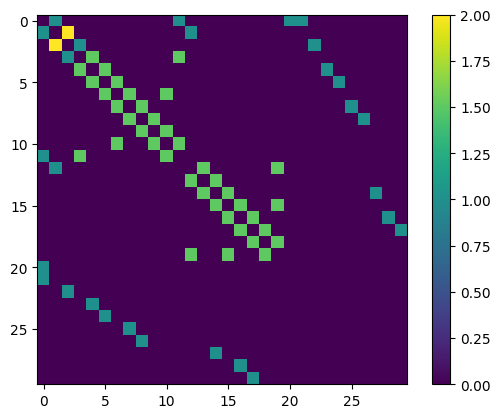

In [26]:
import matplotlib.pyplot as plt

plt.imshow(bond_type_matrix)
plt.colorbar()
plt.show()


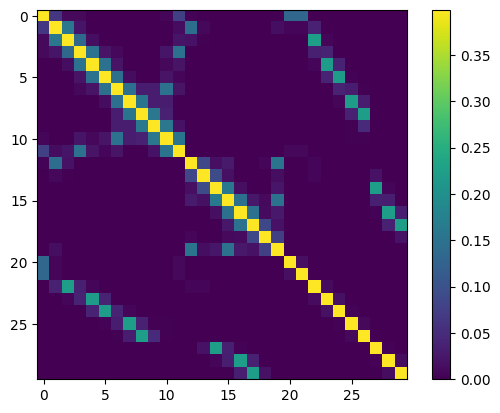

In [27]:
plt.imshow(gb_matrix)
plt.colorbar()
plt.show()

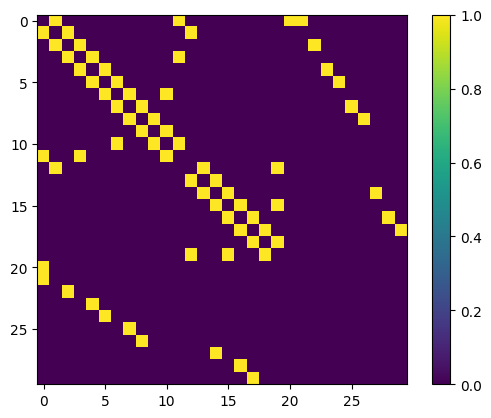

In [28]:
plt.imshow(degree_matrix)
plt.colorbar()

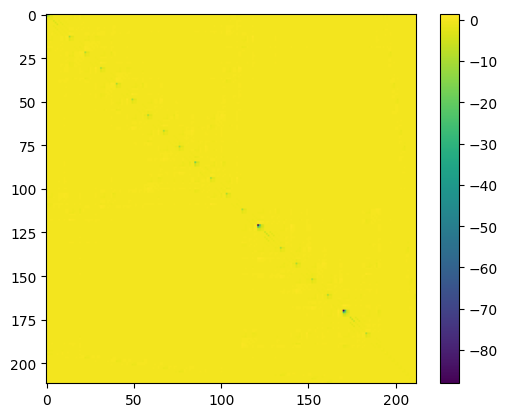

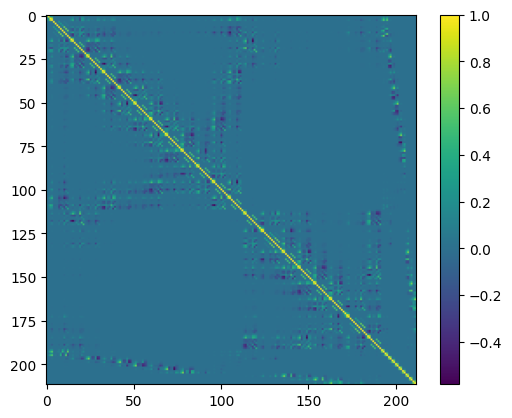

(212, 212)


In [35]:
plt.imshow(Hamiltonian_matrix.toarray())
plt.colorbar()
plt.show()
plt.imshow(Overlap_matrix.toarray())
plt.colorbar()
plt.show()


print(Overlap_matrix.toarray().shape)

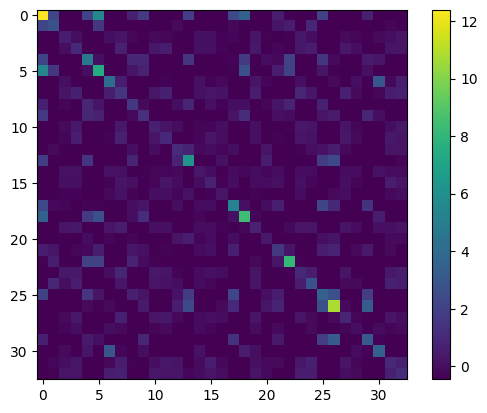

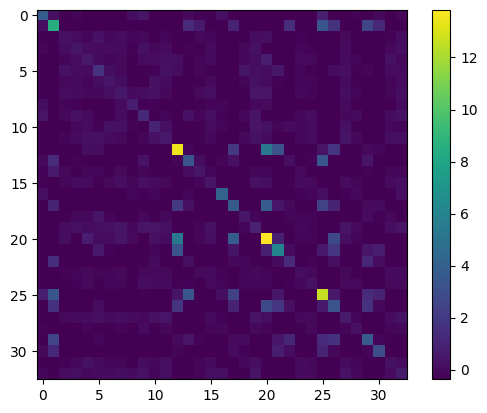

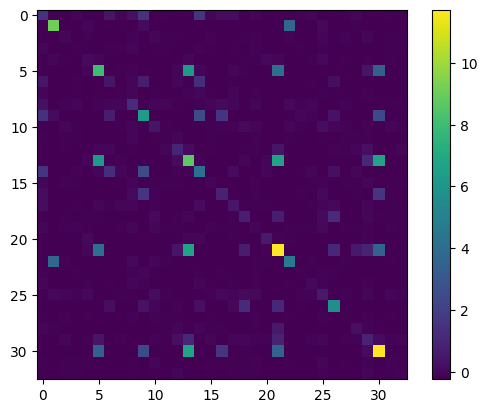

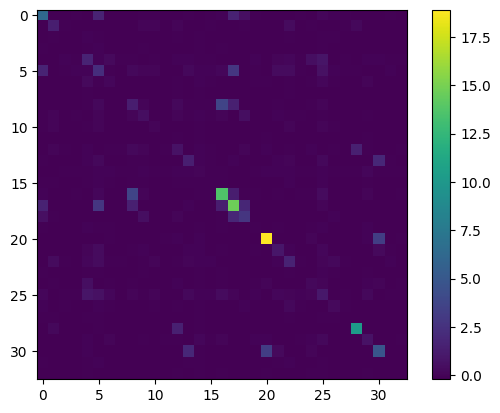

In [30]:
mol2 = '/Users/jiaoyuan/Documents/GitHub/deeph_dft_molecules/deeph_mol/dataset/mol/1.mol2'
torch.manual_seed(42)
np.random.seed(42)
nodes_embed = nodes_embedding.Nodes_Embedding(mol2)
nodes_features = nodes_embed.forward()
edges_embedding_embed = edges_embedding.Edges_Embedding(mol2)
degree_matrix = edges_embedding_embed.get_degree_matrix()
degree_tensor = torch.from_numpy(degree_matrix)

edges1, edges2, degree_tensor = edges_embedding_embed.forward()

gat_layer = GAT_Layer.GATlayer(nodes_features.shape[1], nodes_features.shape[1], 1)
out_nodes_features, connectivity_mask = gat_layer.forward(nodes_features, degree_tensor, edges1, edges2)
out_nodes_features1, connectivity_mask1 = gat_layer.forward(out_nodes_features, connectivity_mask, edges1, edges2)
out_nodes_features2, connectivity_mask2 = gat_layer.forward(out_nodes_features1, connectivity_mask1, edges1, edges2)
out_nodes_features3, connectivity_mask3 = gat_layer.forward(out_nodes_features2, connectivity_mask2, edges1, edges2)
out_nodes_features4, connectivity_mask4 = gat_layer.forward(out_nodes_features3, connectivity_mask3, edges1, edges2)
plt.imshow(connectivity_mask1.detach().numpy())
plt.colorbar()
plt.show()
plt.imshow(connectivity_mask2.detach().numpy())
plt.colorbar()
plt.show()
plt.imshow(connectivity_mask3.detach().numpy())
plt.colorbar()
plt.show()
plt.imshow(connectivity_mask4.detach().numpy())
plt.colorbar()
plt.show()

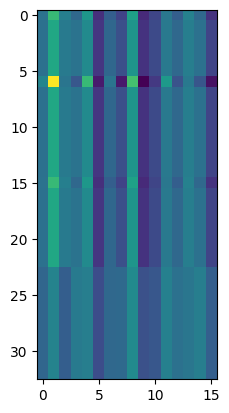

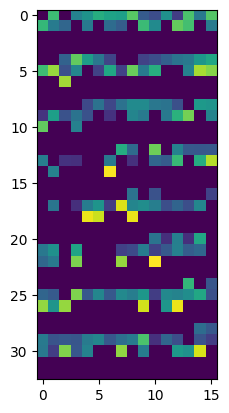

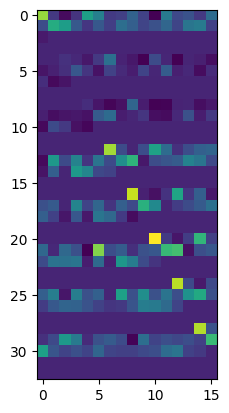

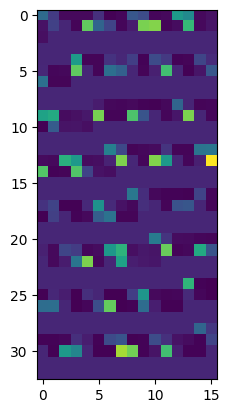

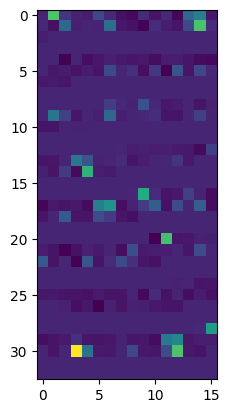

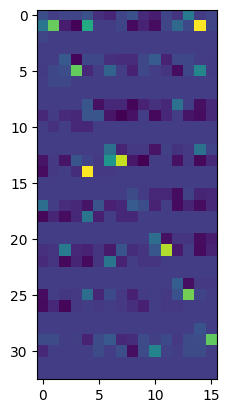

In [31]:
plt.imshow(nodes_features.detach().numpy())
plt.show()

plt.imshow(out_nodes_features.detach().numpy())
plt.show()

plt.imshow(out_nodes_features1.detach().numpy())
plt.show()
plt.imshow(out_nodes_features2.detach().numpy())
plt.show()
plt.imshow(out_nodes_features3.detach().numpy())
plt.show()
plt.imshow(out_nodes_features4.detach().numpy())
plt.show()

In [32]:
print(nodes_features.detach().numpy().shape)
print(out_nodes_features.detach().numpy().shape)

(33, 16)
(33, 16)


In [33]:
print(out_nodes_features.detach().numpy())

[[-0.63178945  2.0623674  -0.63178945  1.1018078   1.3839767   1.8027314
   1.640097    1.5811795   2.2651598   0.49350986  0.29418442  1.3308918
   0.08197922  2.1798697   0.93103296  2.2374842 ]
 [ 1.9721304   0.9968959   0.6662354  -0.63178945  0.9711638  -0.63178945
   0.7496474   0.5284488  -0.63178945  2.039611    1.240583   -0.63178945
   2.3620086   2.11296    -0.63178945  0.999088  ]
 [-0.63178945 -0.63178945 -0.63178945 -0.63178945 -0.63178945 -0.63178945
  -0.63178945 -0.63178945 -0.63178945 -0.63178945 -0.63178945 -0.63178945
  -0.63178945 -0.63178945 -0.63178945 -0.63178945]
 [-0.63178945 -0.63178945 -0.63178945 -0.63178945 -0.63178945 -0.63178945
  -0.63178945 -0.63178945 -0.63178945 -0.63178945 -0.63178945 -0.63178945
  -0.63178945 -0.63178945 -0.63178945 -0.63178945]
 [-0.63178945 -0.63178945  0.5933292   2.3407028   1.549849    0.9294809
   0.18921036 -0.63178945 -0.63178945  0.13730566  0.29443556  0.5685073
   0.8662852   0.9557614   1.4446895   1.7087545 ]
 [ 2.0657